In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy as sci
from scipy.integrate import solve_ivp
from random import *
from itertools import permutations
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from matplotlib import animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML
from collections import deque
import matplotlib

In [2]:
def diminuiLista(lista_teste):
    
    ### função criada para diminuir o numero de pontos e auxiliar o plot da animação
    ### transforma as listas de tamanho 500.000 para 501 
    
    lista_final = []
    tam = len(lista_teste)
    passo = int(tam/500)
    
    for i in range(0, len(lista_teste), passo):
        lista_final.append(lista_teste[i])
    
    return lista_final

In [3]:
class Particula:
    
    def __init__(self, massa, velocidade, vec):
        
        x0, y0, z0 = vec
        
        self.pos = np.array([x0, y0, z0],  dtype='float64')
        
        self.x0 = x0
        self.y0 = y0
        self.z0 = z0
        
        self.x = [x0]
        self.y = [y0]
        self.z = [z0]
        
        self.m = massa
        self.v = np.array(velocidade, dtype='float64')
        
        self.p = self.v*self.m

In [4]:
def calculaPos(p1, p2, p3, r10, r20, r30, tparametro):  
    
    ### calcula as novas posições utilizando o "método de euler" e armazena em listas
    
    G = 6.67408e-11

    ## valores de referência
    
    # valor da constante da gravitação universal
    G = 6.67430e-11

    # valores de referência 
    m_ref = 1.989e30 # massa do sol
    r_ref = 3.4707e12 # distância média entre as estrelas alpha centauri A e alpha centauri B
    v_ref = 29780 # velocidade orbital média da terra em torno do sol 
    t_ref = 79.91*365*24*3600*0.51 # período orbital da estrela alpha centauri A em torno do centro de massa
    
    K1 = G * t_ref * m_ref/(r_ref**2 * v_ref)

    dt = 0.0001    
    t = 0
    
    '''' utilizando o método de euler que usamos para animações em vpython
         calcular a aceleração de cada corpo (segunda derivada da posição)
         calcular o novo momento com base na força resultante
         calcular a posição nova com base no novo valor do momento
         ir armazenando os valores de cada posição tanto no x, y, z em cada dt (0.0001) '''

    while (t < tparametro):

        r1r2 = p1.pos - p2.pos
        r2r1 = p2.pos - p1.pos
        norm_r1r2 = np.linalg.norm(r1r2)
        
        r1r3 = p1.pos - p3.pos
        r3r1 = p3.pos - p1.pos
        norm_r1r3 = np.linalg.norm(r1r3)
        
        r2r3 = p2.pos - p3.pos
        r3r2 = p3.pos - p2.pos
        norm_r2r3 = np.linalg.norm(r2r3)

        ## calculando as acelerações
      
        a1 = (K1 * p2.m * ((r2r1) / norm_r1r2**3 )) + (K1 * p3.m * ((r3r1) / norm_r1r3**3 ))
        a2 = (K1 * p3.m * ((r3r2) / norm_r2r3**3 )) + (K1 * p1.m * ((r1r2) / norm_r1r2**3 ))
        a3 = (K1 * p1.m * ((r1r3) / norm_r1r3**3 )) + (K1 * p2.m * ((r2r3) / norm_r2r3**3))
       
        #a1 = K1*p2.m*(r2r1)/norm_r1r2**3 + K1*p3.m*(r3r1)/norm_r1r3**3
        #a2 = K1*p1.m*(r1r2)/norm_r1r2**3 + K1*p3.m*(r3r2)/norm_r2r3**3
        #a3 = K1*p1.m*(r1r3)/norm_r1r3**3 + K1*p2.m*(r2r3)/norm_r2r3**3

        ## calculando o momento de cada uma

        #p1.p = p1.p + fres1*dt
        p1.p = p1.p + a1*p1.m*dt
        
        #p2.p = p2.p + fres2*dt
        p2.p = p2.p + a2*p2.m*dt
        
        #p3.p = p3.p + fres3*dt
        p3.p = p3.p + a3*p3.m*dt
        
        ## calculando posição

        p1.pos = p1.pos + (p1.p/p1.m)*dt
        p2.pos = p2.pos + (p2.p/p2.m)*dt
        p3.pos = p3.pos + (p3.p/p3.m)*dt

        # #dando append em cada lista de posições

        x1, y1, z1 = p1.pos
        p1.x.append(x1)
        p1.y.append(y1)
        p1.z.append(z1)

        x2, y2, z2 = p2.pos
        p2.x.append(x2)
        p2.y.append(y2)
        p2.z.append(z2)

        x3, y3, z3 = p3.pos
        p3.x.append(x3)
        p3.y.append(y3)
        p3.z.append(z3)

        t += dt

In [5]:
# posição inicial fixa em metros

r10 = [-0.5, 0, 0] 
r20 = [0.5, 0, 0] 
r30 = [0, 1, 0] 

# massa dos três corpos

m1 = 1.1
m2 = 0.907
m3 = 1

# escolha da velocidade inicialem m/s e inicialização das particulas

escolha = 0
tparametro = 0

while (escolha != 1 and escolha != 2):

    print(f"Escolha uma velocidade inicial pré determinada (1 ou 2): ")
    escolha = int(input())

'''Dependendo da escolha do usuário, um tipo de velocidade inicial é inserida na inicialização das partículas'''    

if escolha == 1:

    v10 = [0.01, 0.01, 0] 
    v20 = [-0.05, 0, -0.1] 
    v30 = [0, -0.01, 0]
    
    tparametro = 20
    
    p1 = Particula(m1, v10, r10)

    p2 = Particula(m2, v20, r20)

    p3 = Particula(m3, v30, r30)

elif escolha == 2:
    
    v10 = [0, -0.01, 0] 
    v20 = [0, 0.01, 0] 
    v30 = [0.01, 0.01, -0.01]
    
    tparametro = 2
    
    p1 = Particula(m1, v10, r10)

    p2 = Particula(m2, v20, r20)

    p3 = Particula(m3, v30, r30)

Escolha uma velocidade inicial pré determinada (1 ou 2): 
1


In [6]:
### chama a funçao e calcula a trajetória de cada corpo

calculaPos(p1, p2, p3, r10, r20, r30, tparametro)

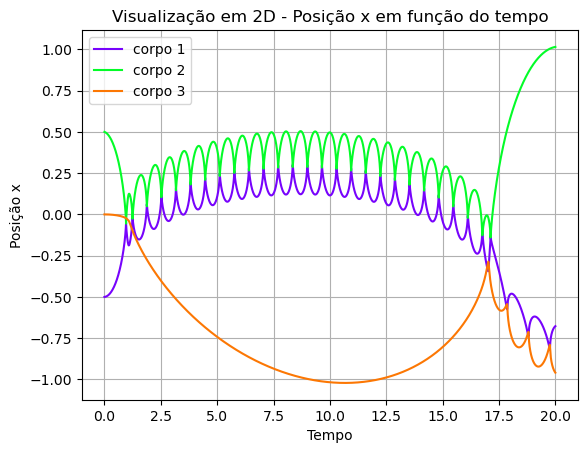

In [7]:
#plot individual do x de cada corpo em função do tempo

dt = 0.0001    
tl = np.arange(0, tparametro + 2*dt, dt)

fig, ax = plt.subplots()
ax.plot(tl, p1.x, color = "#7703fc",label = "corpo 1")
ax.plot(tl, p2.x, color = "#03fc28",label = "corpo 2")
ax.plot(tl, p3.x, color = "#fc7703",label = "corpo 3")
ax.set_title('Visualização em 2D - Posição x em função do tempo')
ax.set_xlabel('Tempo')
ax.set_ylabel('Posição x')
ax.legend()
plt.grid()
plt.show()

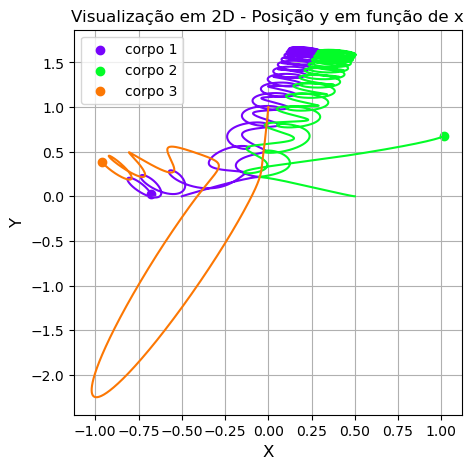

In [8]:
# plotando a posição x de cada corpo em função do y

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(p1.x, p1.y, color="#7703fc")
ax.plot(p2.x, p2.y, color="#03fc28")
ax.plot(p3.x, p3.y, color="#fc7703")

ax.scatter(p1.x[-1], p1.y[-1], color="#7703fc",label='corpo 1')
ax.scatter(p2.x[-1], p2.y[-1], color="#03fc28",label='corpo 2')
ax.scatter(p3.x[-1], p3.y[-1], color="#fc7703",label='corpo 3')
ax.set_title('Visualização em 2D - Posição y em função de x')
ax.set_xlabel('X',fontsize=12)
ax.set_ylabel('Y',fontsize=12)

ax.legend()
ax.grid()
plt.show()

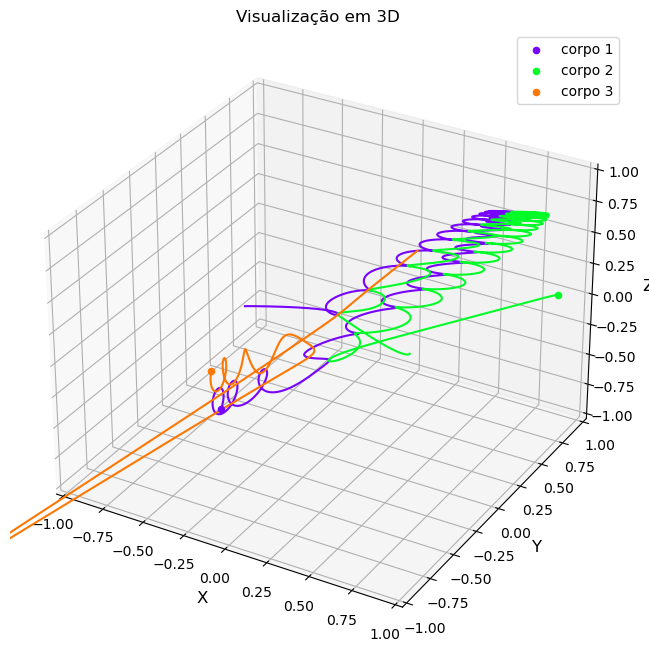

In [9]:
# plotando a posição x, y, z dos três corpos

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = "3d")
ax.plot(p1.x, p1.y, p1.z, color = "#7703fc")
ax.plot(p2.x, p2.y, p2.z, color = "#03fc28")
ax.plot(p3.x, p3.y, p3.z, color = "#fc7703")

ax.scatter(p1.x[-1], p1.y[-1], p1.z[-1], color = "#7703fc",label = "corpo 1")
ax.scatter(p2.x[-1], p2.y[-1], p2.z[-1], color = "#03fc28",label = "corpo 2")
ax.scatter(p3.x[-1], p3.y[-1], p3.z[-1], color = "#fc7703",label = "corpo 3")

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

ax.set_title('Visualização em 3D')
ax.set_xlabel('X', fontsize = 12)
ax.set_ylabel('Y', fontsize = 12)
ax.set_zlabel('Z', fontsize = 12)

ax.legend()
plt.show()

In [10]:
# diminuindo o tamanho das listas

'''Devido ao dt escolhido para o método ter que ser tão pequeno, a função calculanovaPos retorna vetores muitos 
grandes (na grandeza de 10⁴ até 10⁵ elementos), fazendo com que a animação seja inviável, demorando mais de 10
minutos para gerar um gif. Dessa maneira, a função diminui lista foi criada, pegando pontos de tal maneira que 
no final, sempre terá 501 para plotagem'''

p1xf = diminuiLista(p1.x)
p1yf = diminuiLista(p1.y)
p1zf = diminuiLista(p1.z)

p2xf = diminuiLista(p2.x)
p2yf = diminuiLista(p2.y)
p2zf = diminuiLista(p2.z)

p3xf = diminuiLista(p3.x)
p3yf = diminuiLista(p3.y)
p3zf = diminuiLista(p3.z)

In [11]:
### monitora o tamanho de todas as listas

'''plotar mais que 500 pontos na animação pode demorar muito e até crashar o computador'''

len(p1xf)

501

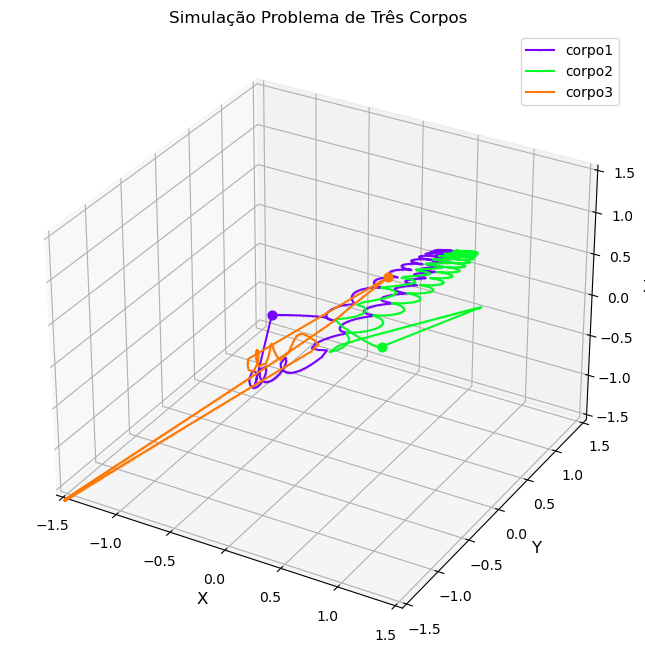

In [12]:
'''A animação 3d tá instável para as novas versões do python, se não rodar, cada gif que deve ser gerado estará
disponível na mesma pasta que esse arquivo'''

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = '3d')

### armazena o "historico" de cada corpo

his1x = deque(maxlen = len(p1xf))
his1y = deque(maxlen = len(p1yf))
his1z = deque(maxlen = len(p1zf))
his2x = deque(maxlen = len(p2xf))
his2y = deque(maxlen = len(p2yf)) 
his2z = deque(maxlen = len(p2zf))                   
his3x = deque(maxlen = len(p3xf))
his3y = deque(maxlen = len(p3yf))
his3z = deque(maxlen = len(p3zf))

### define os pontos iniciais

corpo1 = [ax.scatter(p1xf,p1yf,p1zf)]
corpo2 = [ax.scatter(p2xf,p2yf,p2zf)]
corpo3 = [ax.scatter(p3xf,p3yf,p3zf)]

def animate(i,corpo1,corpo2,corpo3):
    
    ### remove os pontos inciais
    
    corpo1[0].remove()
    corpo2[0].remove()
    corpo3[0].remove()
    
    ### itera sobre cada corpo para gerar a animacao

    corpo1[0]=ax.scatter(p1xf[i],p1yf[i],p1zf[i],s=40,color ='#7703fc') ### (roxo)
    corpo2[0]=ax.scatter(p2xf[i],p2yf[i],p2zf[i],s=40,color ='#03fc28') ### (verde)
    corpo3[0]=ax.scatter(p3xf[i],p3yf[i],p3zf[i],s=40,color ='#fc7703') ### (laranja)


    ### armazena o historico da posicao de cada corpo nos eixos x y z
    
    his1x.append(p1xf[i])
    his1y.append(p1yf[i])
    his1z.append(p1zf[i])
    his2x.append(p2xf[i])
    his2y.append(p2yf[i])
    his2z.append(p2zf[i])
    his3x.append(p3xf[i])
    his3y.append(p3yf[i])
    his3z.append(p3zf[i])
    
                     
    trace1.set_data_3d(his1x,his1y,his1z)
    trace2.set_data_3d(his2x,his2y,his2z)
    trace3.set_data_3d(his3x,his3y,his3z)
    

    return corpo1, corpo2, corpo3, trace1, trace2, trace3


trace1, = ax.plot([],[],[], 'o-',markersize=0.2, color ='#7703fc',label='corpo1') ### traçado do corpo 1 (roxo)
trace2, = ax.plot([],[],[], 'o-',markersize=0.2, color ='#03fc28',label='corpo2') ### traçado do corpo 2 (verde)
trace3, = ax.plot([],[],[], 'o-',markersize=0.2, color ='#fc7703',label='corpo3') ### traçado do corpo 3 (laranja)

ax.set_xlabel('X',fontsize=12)
ax.set_ylabel('Y',fontsize=12)
ax.set_zlabel('Z',fontsize=12)
ax.set_title('Simulação Problema de Três Corpos')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(-1.5,1.5)
ax.legend()
anima = animation.FuncAnimation(fig,animate,frames=len(p1xf),blit=False,interval=24,fargs=(corpo1,corpo2,corpo3))
matplotlib.rcParams['animation.embed_limit'] = 2**128

''' comentar o HTML(anima.to_jshtml()) se quiser salvar a gif no computador'''
''' comentar o anima.save('trabalhoicf.gif', writer='pillow', fps=30) se quiser mostrar a animação no código
em tempo real'''

#HTML(anima.to_jshtml())
anima.save('trabalhoicf.gif', writer='pillow', fps=30)